In this notebook I am going to do an exploratory analysis on Pitchfork reviews data. The data was taken from Kaggle (https://www.kaggle.com/nolanbconaway/pitchfork-data).
The questions that I am trying to answer are: <br>
    1. Who has the most rated albums by Pitchfork? <br>
    2. Who has the most reviewed by pitchfork and has a score of 10? <br>
    3. Which year is the highest rated? <br>
    4. Who is the best artist according to Pitchfork? <br>
    5. What is the Pitchfork's genre selection over the years? <br>
    6. Which artists improved themselves?

In [1]:
import pandas as pd

rew_tb = pd.read_csv("reviews.csv")
art_tb = pd.read_csv("artists.csv")
y_tb = pd.read_csv("years.csv")
g_tb = pd.read_csv("genres.csv")
print(rew_tb.dtypes)
rew_tb.head()

reviewid            int64
title              object
artist             object
url                object
score             float64
best_new_music      int64
author             object
author_type        object
pub_date           object
pub_weekday         int64
pub_day             int64
pub_month           int64
pub_year            int64
dtype: object


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In here I am cleaning the data. Also, I am excluding the reviews which includes more than one artist.

In [2]:
rew_tb.drop_duplicates(ignore_index=True, inplace=True)
rew_tb["mul"] = rew_tb['artist'].str.contains(r',')
rew_tb = rew_tb[rew_tb["mul"] == False]
rew_tb = rew_tb[rew_tb["artist"] != "various artists"]
y_tb = y_tb.fillna(-1000)

As you can see from below, I am merging all the needed data into one data frame and correcting their data types.

In [3]:
fin_tb = pd.merge(rew_tb[['artist', 'title', 'reviewid', 'score', 'pub_year']], y_tb, on='reviewid')
fin_tb = pd.merge(fin_tb[['artist', 'title', 'reviewid', 'score', 'year', 'pub_year']], g_tb, on='reviewid')
fin_tb = fin_tb.astype({'title': 'string', 'artist': 'string', 'genre': 'string', 'year': 'int64'})
print(fin_tb.dtypes)
fin_tb.head()

artist       string
title        string
reviewid      int64
score       float64
year          int64
pub_year      int64
genre        string
dtype: object


,artist,title,reviewid,score,year,pub_year,genre
0,massive attack,mezzanine,22703,9.3,1998,2017,electronic
1,krallice,prelapsarian,22721,7.9,2016,2017,metal
2,uranium club,all of them naturals,22659,7.3,2016,2017,rock
3,taso,new start,22725,8.1,2016,2017,electronic
4,little simz,stillness in wonderland,22704,7.1,2016,2017,rap


**1. Who has the most rated albums by Pitchfork?**

Because of the merging I did when I am looking purely at the number of the albums an artist made, I need to drop the duplicates. In here we are seeing top 10 most artists reviewed by Pitchfork.

In [4]:
albums = fin_tb.drop_duplicates(subset=['artist', 'title'])
print(albums.iloc[0:, 0:2].groupby('artist').count().sort_values('title', ascending=False)
      .rename(columns={'title': 'count'}).head(10))

                   count
artist                  
guided by voices      23
david bowie           21
the beatles           21
mogwai                20
robert pollard        19
neil young            19
of montreal           19
the fall              18
xiu xiu               17
animal collective     16


In here I am looking at top 10 most artists reviewed by Pitchfork and had a score more than 8.

In [5]:
print(albums[albums['score'] >= 8].iloc[0:, 0:2].groupby('artist').count().sort_values('title', ascending=False)
      .rename(columns={'title': 'count'}).head(10))

                   count
artist                  
the beatles           16
miles davis           12
david bowie           11
r.e.m.                 9
califone               9
bob dylan              9
radiohead              8
mogwai                 8
animal collective      8
sonic youth            8


**2. Who has the most reviewed by pitchfork and has a score of 10?**

In here I am looking at top 10 most artists reviewed by Pitchfork and had a score of 10.

In [6]:
print(albums[albums['score'] == 10].iloc[0:, 0:2].groupby('artist').count().sort_values('title', ascending=False)
      .rename(columns={'title': 'count'}).head(10))

                        count
artist                       
the beatles                 7
prince                      3
the velvet underground      3
nirvana                     2
r.e.m.                      2
radiohead                   2
david bowie                 2
john coltrane               2
the rolling stones          2
pavement                    2


**3. Which year is the highest rated?**

Now we are going to look at most successful year judging from review scores. I am going to take the year from when the album was out not from when it was reviewed.

In [7]:
bst_y = fin_tb.iloc[0:, [0, 1, 3, 4]].sort_values('year', ascending=False)
bst_y.head()

,artist,title,score,year
6,brian eno,reflection,7.7,2017
908,dej loaf,all jokes aside,7.5,2016
851,death grips,bottomless pit,8.1,2016
858,mary chapin carpenter,the things that we are made of,6.8,2016
857,gregory porter,take me to the alley,6.7,2016


I am keeping the reviews with multiple years. From the result we can see they are very close, but the best year was 2016.

In [8]:
def year_score(a):
    a = a.drop_duplicates(subset=['artist', 'year', 'title'])
    n = a.count()[0]
    if n >= 1000:
        y = a.iloc[0, 3]
        return {'year': y, 'score': a['score'].mean()}

    
y_s = [a for a in bst_y.groupby('year').apply(year_score) if a != None]
y_s = pd.DataFrame(y_s).sort_values('score', ascending=False)
y_s

,year,score
11,2016,7.186878
10,2015,7.101558
9,2014,7.079736
8,2013,7.042308
6,2011,7.037233
7,2012,7.012345
0,2005,7.008924
1,2006,6.966515
5,2010,6.966258
4,2009,6.859798


**4. Who is the best artist according to Pitchfork?**

In here I am looking at artists mean scores and their best albums. To refrain from list being dominated by one album 10 scored artists, we are looking at artists who had at least 5 albums. As you can see the best artist is the velvet underground with a score of 9.46. And their best oldest album is white light/white heat.

In [9]:
def album_ranker(a):
    a = a.drop_duplicates(subset=['artist', 'title'])
    n = a.count()[0]
    if n >= 5:
        artist = a.iloc[0, 0]
        m = max(a['score'])
        m1 = a[a['score'] == m].sort_values('year', ascending=True).iloc[0, 1]
        return {'artist': artist, 'score': a['score'].mean(), 'best_album': m1}


bst_a = [a for a in bst_y.groupby('artist').apply(album_ranker) if a != None]
bst_a = pd.DataFrame(bst_a).sort_values('score', ascending=False)
bst_a.head(10)

,artist,score,best_album
684,the velvet underground,9.457143,white light/white heat
468,pavement,9.000000,"crooked rain, crooked rain: la's desert origins"
603,the beatles,8.890476,stereo box
555,sleater-kinney,8.860000,start together
106,caetano veloso,8.840000,caetano veloso
299,joanna newsom,8.760000,ys
405,miles davis,8.730769,"live at the fillmore east (march 7, 1970): it'..."
82,blur,8.585714,midlife: a beginner's guide to blur
162,deerhunter,8.562500,microcastle / weird era cont.
702,tom waits,8.542857,mule variations


**5. What is the Pitchfork's genre selection over the years?**

In here I am cleaning the data frame for investigating Pitchfork’s genre selection over the years. I am not including 2017 because this data was taken when 2017 was not over.

In [10]:
g_y = fin_tb.drop_duplicates(subset=['artist', 'pub_year', 'title', 'genre'])
g_y = g_y.iloc[0:, [1, 5, 6]].sort_values('pub_year', ascending=False)
g_y = g_y[g_y['genre'] != '<NA>']
g_y = g_y[g_y['pub_year'] != 2017]
genres = g_y['genre'].drop_duplicates()
g_y = g_y.groupby(['genre', 'pub_year'])['title'].nunique().reset_index().rename(columns={'title': 'count'})
g_y.head()

,genre,pub_year,count
0,electronic,1999,68
1,electronic,2000,79
2,electronic,2001,98
3,electronic,2002,186
4,electronic,2003,255


As you can see from the figure Pitchfork primarily reviewed rock albums.

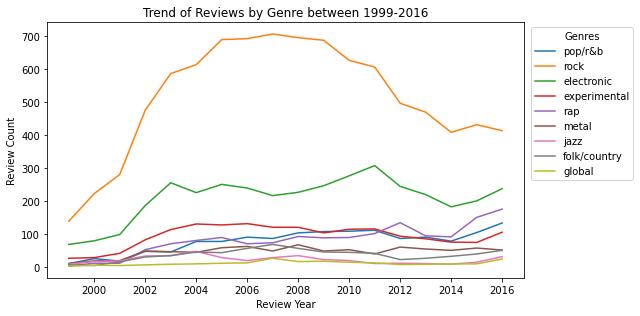

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ax = plt.figure(figsize=(9, 4.5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for genre in genres:
    ax.plot('pub_year', 'count', data=g_y[g_y['genre'] == genre])


ax.legend(genres, bbox_to_anchor=(1.005, 1), title='Genres')
plt.ylabel('Review Count')
plt.xlabel('Review Year')
plt.title('Trend of Reviews by Genre between 1999-2016')
plt.tight_layout()
plt.show()

**6. Which artists improved themselves?**

In here I am going to look at which artists constantly improved themselves and raised their review scores. As you can see the code successfully found the improved artists.

In [12]:
def imp_album(a):
    a = a.drop_duplicates(subset=['artist', 'title'])
    n = a.count()[0]
    if n >= 2:
        artist = a.iloc[0, 0]
        fscore = a.iloc[0, 2]
        flag = True
        for score in a['score']:
            if fscore > score:
                flag = False
                break
            else:
                fscore = score
        return {'artist': artist, 'is_improved': flag}
    

bst_y = bst_y.sort_values('year', ascending=True)
improvement = [a for a in bst_y.groupby('artist').apply(imp_album) if a != None]
improvement = pd.DataFrame(improvement)

albums = albums.iloc[0:, [0, 1, 3, 4]].sort_values('year', ascending=True)

improvement.head()

,artist,is_improved
0,!!!,False
1,+/-,False
2,-ziq,False
3,...and you will know us by the trail of dead,False
4,12 rods,True


In [13]:
print(improvement[improvement['artist'] == 'pavement'], '\n')
albums[albums['artist'] == 'pavement']

        artist  is_improved
2229  pavement        False 



,artist,title,score,year
17202,pavement,"crooked rain, crooked rain: la's desert origins",10.0,1994
10929,pavement,brighten the corners: nicene creedence ed.,8.7,1997
14154,pavement,wowee zowee: sordid sentinels edition,9.3,2006
9195,pavement,quarantine the past,10.0,2010
1736,pavement,"the secret history, vol. 1",7.0,2015


In [14]:
print(improvement[improvement['artist'] == 'angel olsen'], '\n')
albums[albums['artist'] == 'angel olsen']

          artist  is_improved
134  angel olsen         True 



,artist,title,score,year
5596,angel olsen,half way home,8.0,2012
3642,angel olsen,burn your fire for no witness,8.3,2014
414,angel olsen,my woman,8.8,2016
